<a href="https://colab.research.google.com/github/Bhargavi19/AdultDatasetAnalysis/blob/main/DV_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# define the dataset location
filename = 'adult-all.csv'
# load the csv file as a data frame
dataframe = pd.read_csv(filename, header=None, na_values='?')
dataframe.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']

dataframe = dataframe.dropna() # drop rows with missing

# summarize the shape of the dataset
print(dataframe.shape)

# summarize the class distribution
target = dataframe.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

(45222, 15)
Class=<=50K, Count=34014, Percentage=75.216%
Class=>50K, Count=11208, Percentage=24.784%


Preprocessing

In [4]:
dataframe['workclass'] = dataframe['workclass'].astype('category').cat.codes
dataframe['education'] = dataframe['education'].astype('category').cat.codes
dataframe['marital-status'] = dataframe['marital-status'].astype('category').cat.codes
dataframe['occupation'] = dataframe['occupation'].astype('category').cat.codes
dataframe['relationship'] = dataframe['relationship'].astype('category').cat.codes
dataframe['race'] = dataframe['race'].astype('category').cat.codes
dataframe['sex'] = dataframe['sex'].astype('category').cat.codes
dataframe['native-country'] = dataframe['native-country'].astype('category').cat.codes
dataframe['label'] = dataframe['label'].astype('category').cat.codes
dataframe['label'] = dataframe['label'].astype('object')

dataframe.drop(columns='education-num') # education and education-num is the same thing

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,5,77516,9,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,2,245211,9,4,9,3,4,1,0,0,40,38,0
48837,39,2,215419,9,0,9,1,4,0,0,0,36,38,0
48839,38,2,374983,9,2,9,0,4,1,0,0,50,38,0
48840,44,2,83891,9,0,0,3,1,1,5455,0,40,38,0


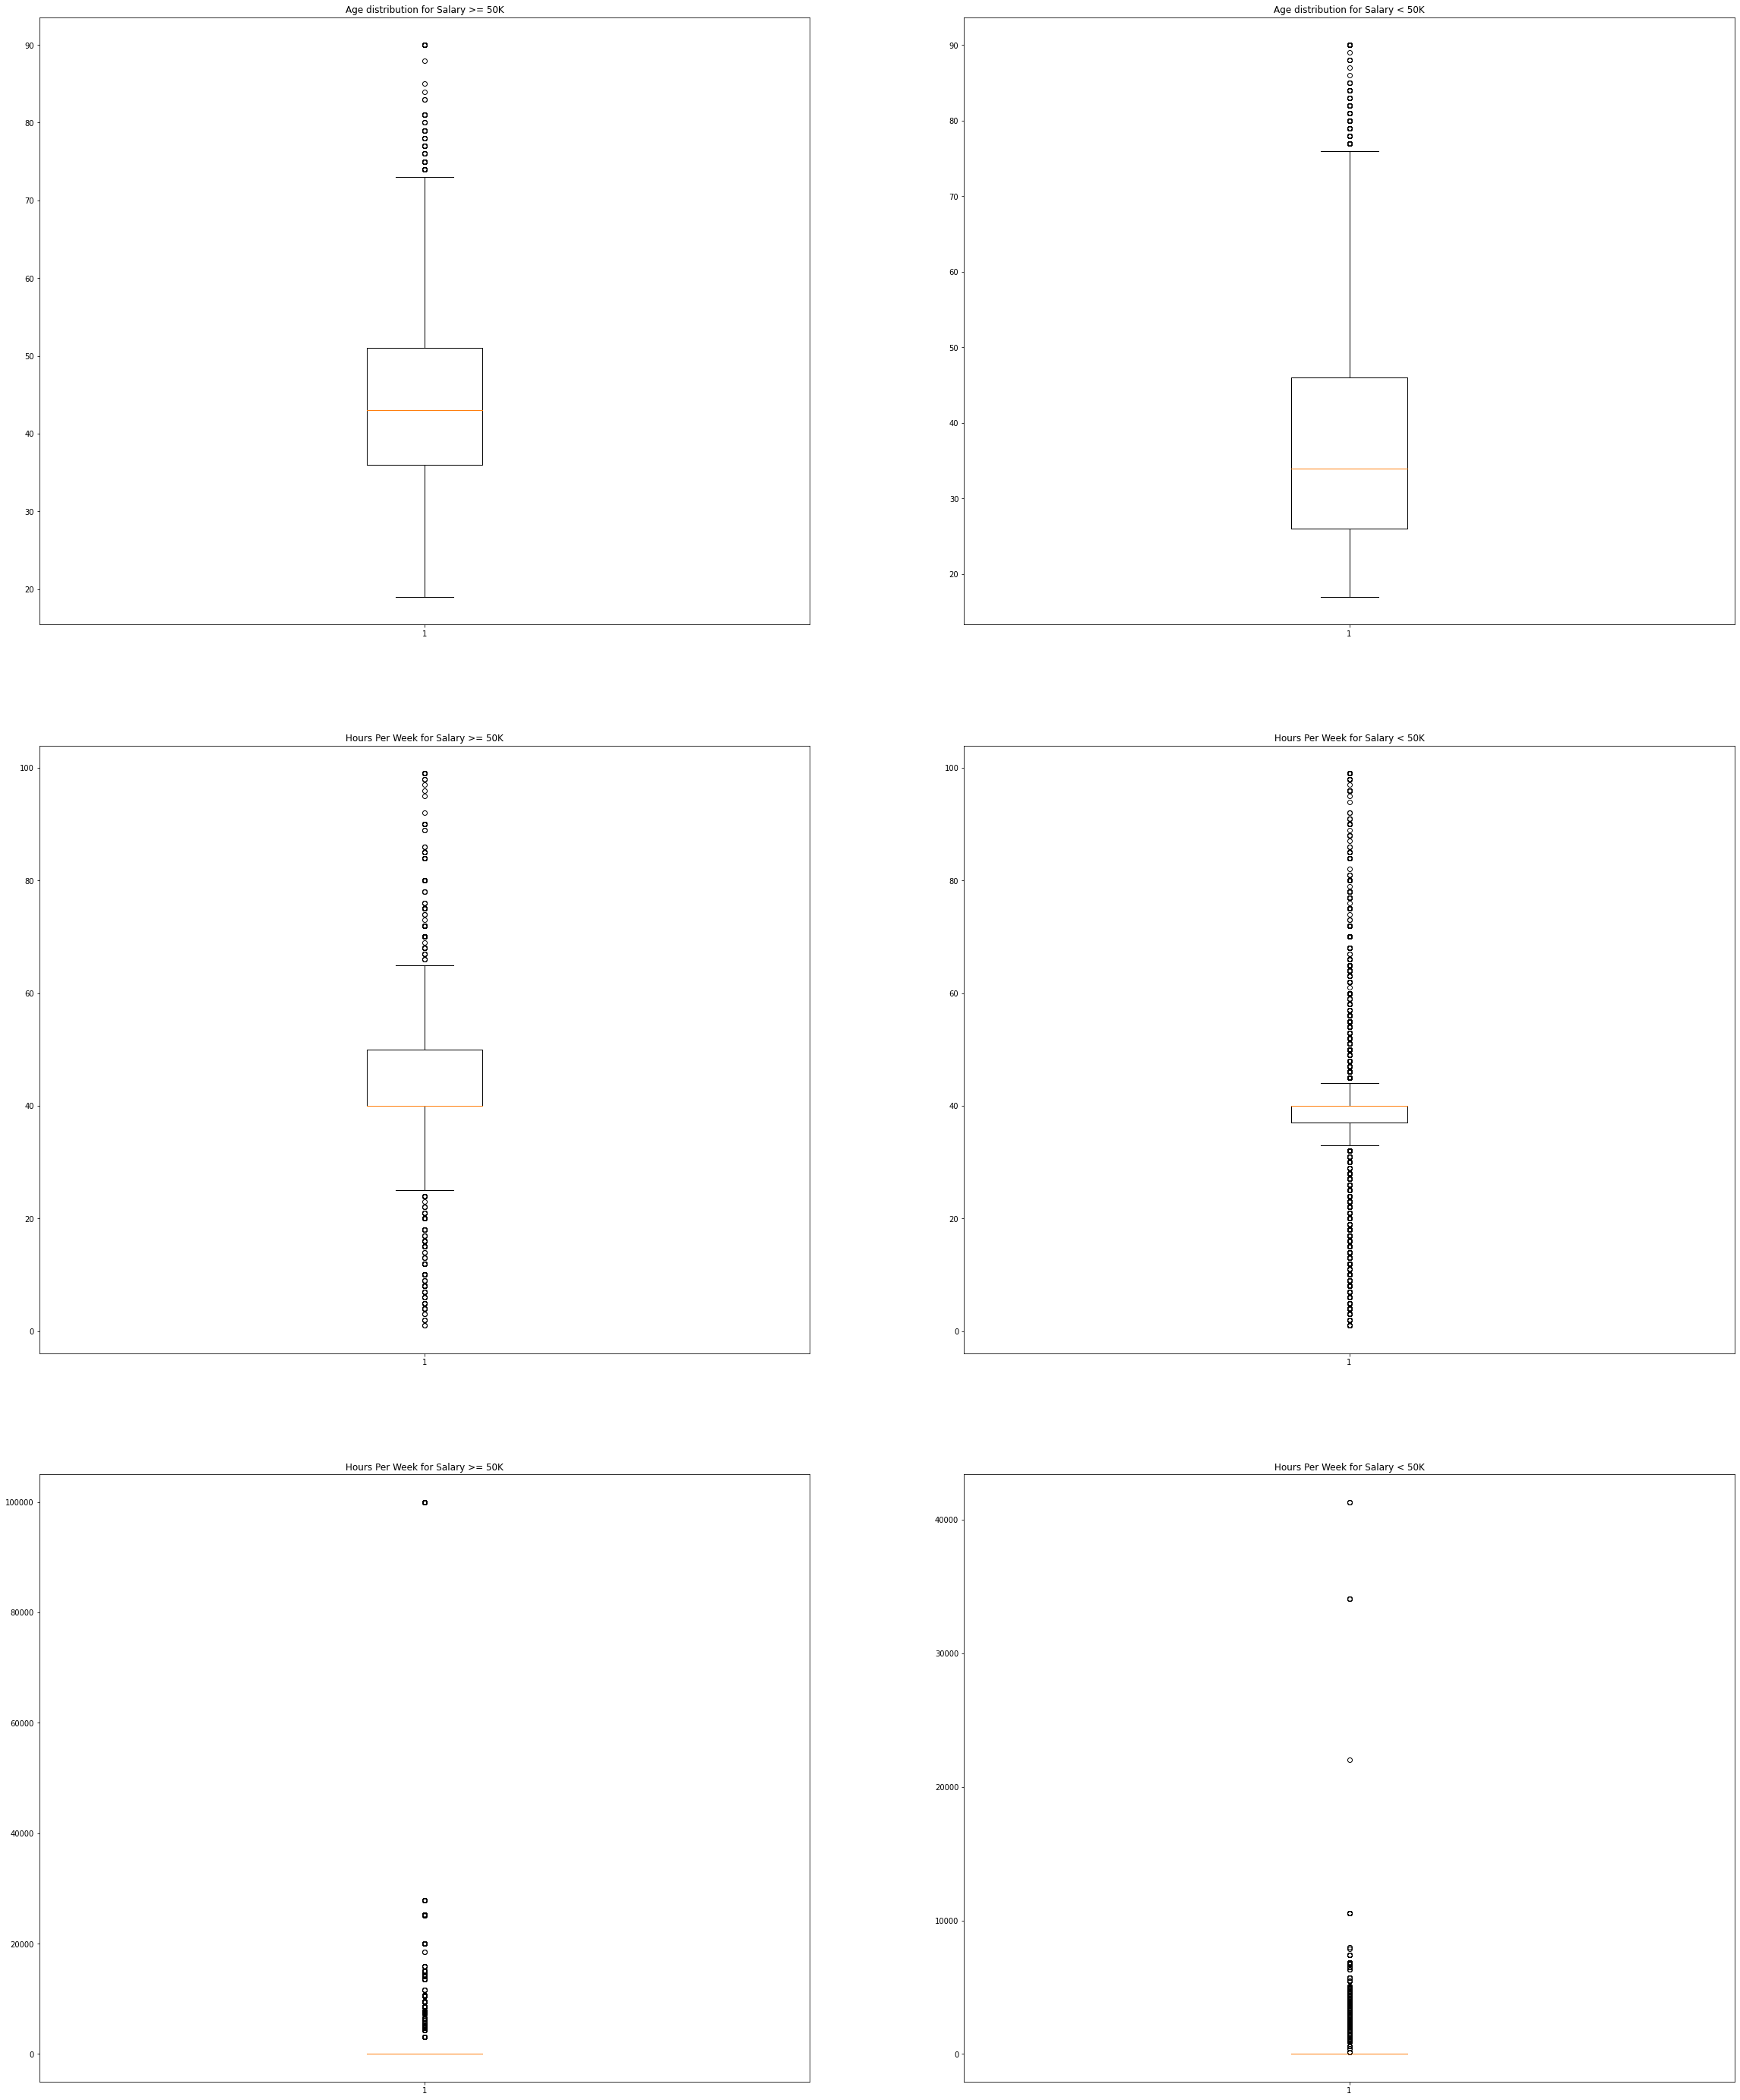

In [9]:
# Visualizations with Box and Whisker plots for the different numerical variables to get an insight into their distribution. 
df = dataframe

plt.figure(figsize=(40,50))

plt.subplot(3, 2, 1)
plt.boxplot(df[df['label']==1]['age'].values)
plt.title('Age distribution for Salary >= 50K')

plt.subplot(3, 2, 2)
plt.boxplot(df[df['label']==0]['age'].values)
plt.title('Age distribution for Salary < 50K')


plt.subplot(3, 2, 3)
plt.boxplot(df[df['label']==1]['hours-per-week'].values)
plt.title('Hours Per Week for Salary >= 50K')

plt.subplot(3, 2, 4)
plt.boxplot(df[df['label']==0]['hours-per-week'].values)
plt.title('Hours Per Week for Salary < 50K')

plt.subplot(3, 2, 5)
plt.boxplot(df[df['label']==1]['capital-gain'].values)
plt.title('Hours Per Week for Salary >= 50K')

plt.subplot(3, 2, 6)
plt.boxplot(df[df['label']==0]['capital-gain'].values)
plt.title('Hours Per Week for Salary < 50K')
#.astype('int'))
plt.show()


In [13]:
catcols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
intcols = ['age','fnlwgt', 'capital-loss', 'capital-gain', 'hours-per-week']

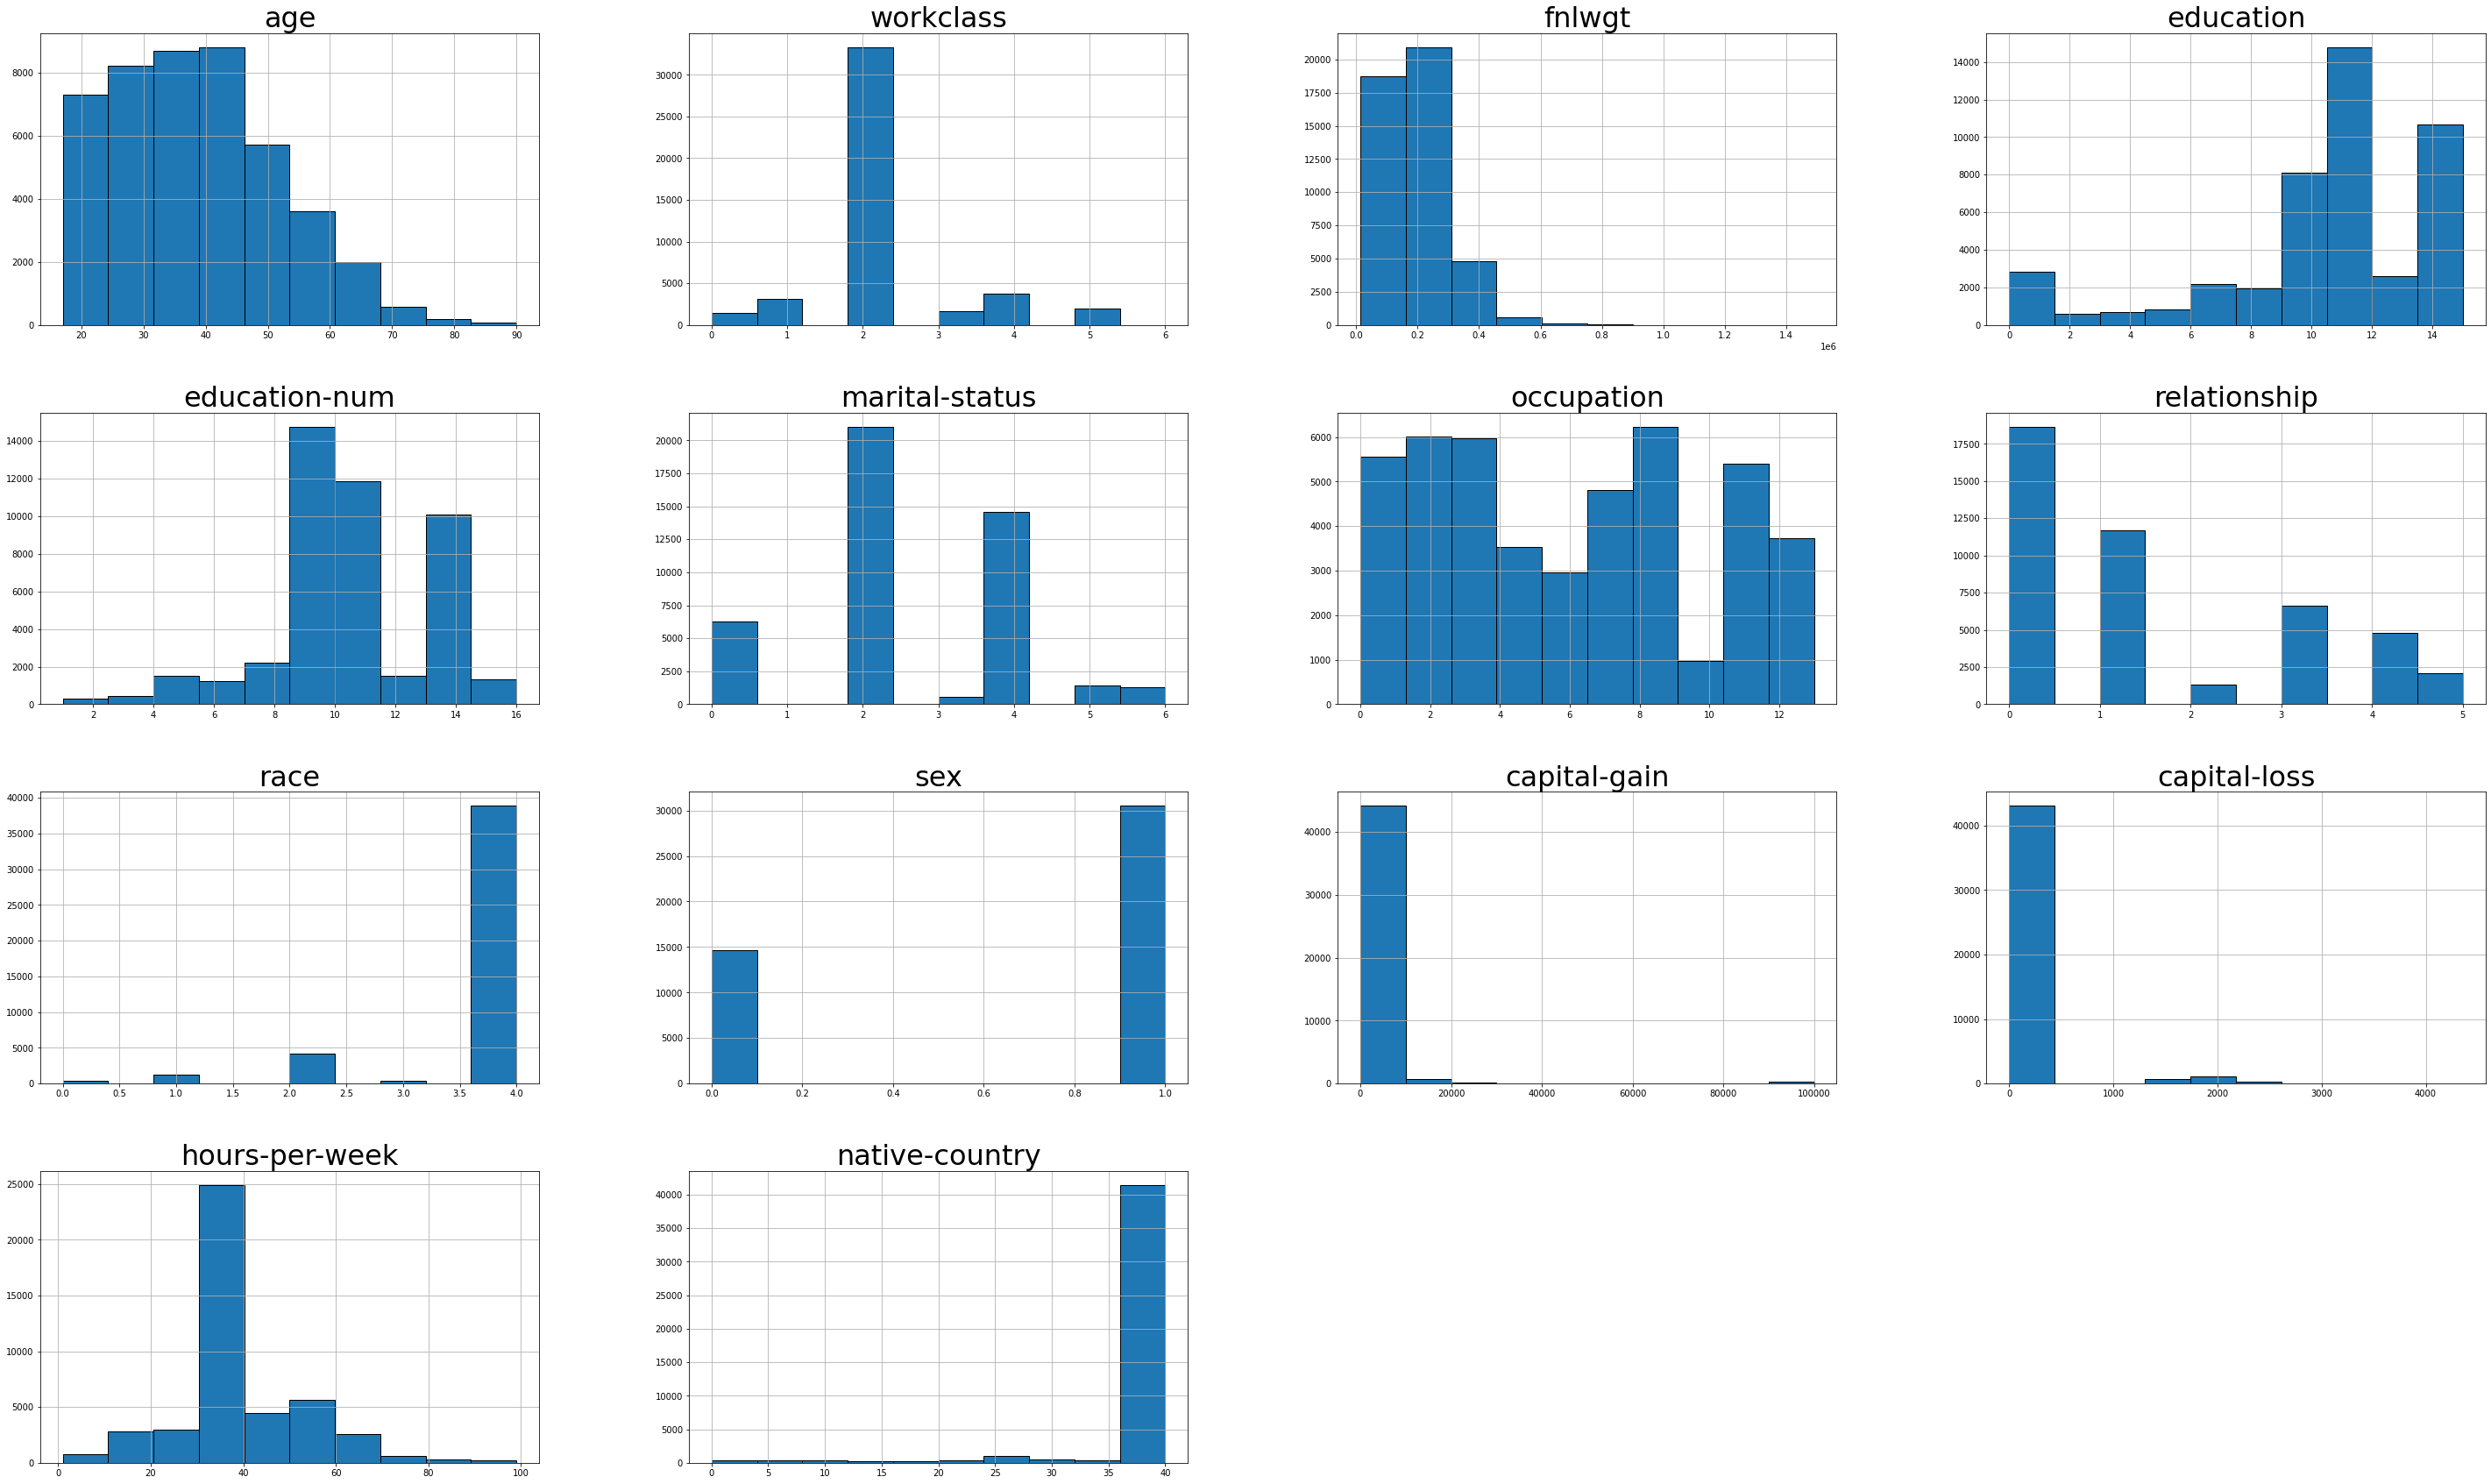

In [17]:
fig = dataframe.hist(figsize=(50, 30), ec = 'k')
p = [x.title.set_size(32) for x in fig.ravel()]

In [6]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(dataframe.loc[:, dataframe.columns != 'label'])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
c2labels = pd.DataFrame(dataframe[Kmean.labels_ == 1]['label'])
c1labels = pd.DataFrame(dataframe[Kmean.labels_ == 0]['label'])
c3labels = pd.DataFrame(dataframe[Kmean.labels_ == 2]['label'])
#c4labels = pd.DataFrame(dataframe[Kmean.labels_ == 3]['label'])


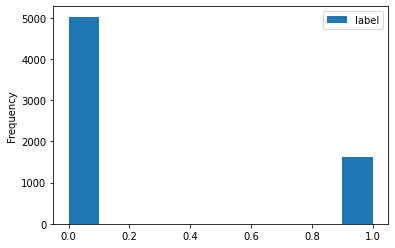

In [8]:
c2labels.plot.hist()

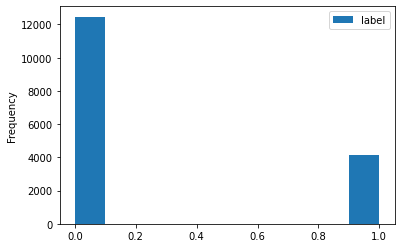

In [9]:
c1labels.plot.hist()

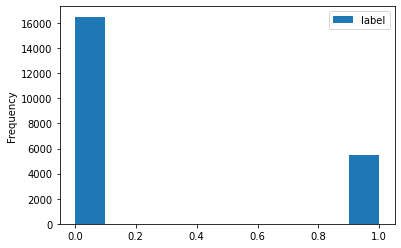

In [10]:
c3labels.plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa267283ed0>]],
      dtype=object)

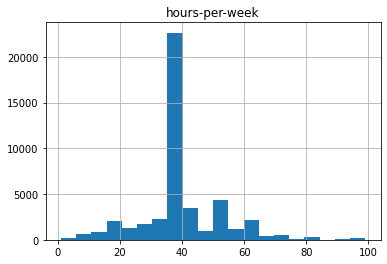

In [26]:
dataframe[['hours-per-week']].hist(bins=20)

In [39]:
dataframe

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,2,245211,9,13,4,9,3,4,1,0,0,40,38,0
48837,39,2,215419,9,13,0,9,1,4,0,0,0,36,38,0
48839,38,2,374983,9,13,2,9,0,4,1,0,0,50,38,0
48840,44,2,83891,9,13,0,0,3,1,1,5455,0,40,38,0
